In [1]:
import pickle as pkl

# Predictions

In [2]:
with open('/usrvol/explainability_results/related_pred_0.pkl', 'rb') as f:
    related_pred = pkl.load(f)

In [3]:
related_pred

[[{'masked': 0.9947611689567566,
   'maskout': 0.6537880301475525,
   'origin': 0.8457810878753662,
   'sparsity': 0.75},
  {'masked': 0.48465779423713684,
   'maskout': 0.36948683857917786,
   'origin': 0.8457810878753662,
   'sparsity': 0.85}],
 [{'masked': 0.6877513527870178,
   'maskout': 0.6669411659240723,
   'origin': 0.9796431660652161,
   'sparsity': 0.6666666666666667},
  {'masked': 0.9945757389068604,
   'maskout': 0.8040359020233154,
   'origin': 0.9796431660652161,
   'sparsity': 0.6666666666666667}],
 [{'masked': 0.9751864075660706,
   'maskout': 0.9073665142059326,
   'origin': 0.9595330953598022,
   'sparsity': 0.6923076923076923},
  {'masked': 0.919075608253479,
   'maskout': 0.7020305395126343,
   'origin': 0.9595330953598022,
   'sparsity': 0.6153846153846154}],
 [{'masked': 0.053748663514852524,
   'maskout': 0.9347259998321533,
   'origin': 0.931563138961792,
   'sparsity': 0.7619047619047619},
  {'masked': 0.7471812963485718,
   'maskout': 0.7607758045196533,
   '

In [4]:
fidelity_list = []
for i in range(len(related_pred)):
    fidelity1 = 1- abs(related_pred[i][0]['masked'] - related_pred[i][0]['maskout'])
    fidelity2 = 1- abs(related_pred[i][1]['masked'] - related_pred[i][1]['maskout'])
    fidelity_list.append((fidelity1, fidelity2))

In [5]:
for i in range(len(fidelity_list)):
    print(fidelity_list[i])

(0.6590268611907959, 0.884829044342041)
(0.9791898131370544, 0.8094601631164551)
(0.9321801066398621, 0.7829549312591553)
(0.1190226636826992, 0.9864054918289185)
(0.9634048938751221, 0.9450945258140564)
(0.3171551823616028, 0.6317161917686462)
(0.9423068165779114, 0.7065122723579407)
(0.9985566139221191, 0.968247652053833)
(0.980694591999054, 0.7644987106323242)
(0.3574519529938698, 0.5732187479734421)
(0.6653241515159607, 0.6994833946228027)
(0.9647534489631653, 0.5169067680835724)
(0.42498745024204254, 0.756748765707016)
(0.839802622795105, 0.9770611524581909)
(0.6755132898688316, 0.21778099238872528)
(0.583565890789032, 0.675832062959671)
(0.6954015642404556, 0.8562961220741272)
(0.8531539440155029, 0.33096401393413544)
(0.9307749271392822, 0.9738984704017639)
(0.9707780480384827, 0.9365304112434387)
(0.4823533296585083, 0.9225826114416122)
(0.2615343779325485, 0.09736644476652145)
(0.8542312979698181, 0.5143274255096912)
(0.9681332111358643, 0.6920256614685059)
(0.1948751956224441

# Subgraph Visualization

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
with open('/usrvol/explainability_results/results_0.pkl', 'rb') as f:
    results = pkl.load(f)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
results[0][0][0]['data'].outer_graphs

[[tensor([[-0.4443,  0.2456, -0.2591,  ..., -0.5445,  0.1151,  0.7983],
          [-0.4854,  0.4366, -0.3030,  ..., -0.4665,  0.0553,  0.7620],
          [-0.4854,  0.4366, -0.3030,  ..., -0.4665,  0.0553,  0.7620],
          ...,
          [-0.3096, -0.0073,  0.3783,  ...,  0.0252, -0.2902,  0.0969],
          [ 0.5333, -0.3043,  0.6968,  ..., -0.0253,  0.1378,  0.1148],
          [-0.2799,  0.2356,  0.3448,  ...,  0.3333,  0.5118,  0.2061]])],
 [tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  4,  4,  5,  5,
            6,  6,  7,  7,  7,  7,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11,
           12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 17, 17,
           18, 18, 19, 19],
          [ 0,  1,  7,  0,  1,  2,  6,  1,  2,  3,  4,  5,  2,  3,  2,  4,  2,  5,
            1,  6,  0,  7,  8,  9,  7,  8,  7,  9, 10, 13,  9, 10, 11, 12, 10, 11,
           10, 12,  9, 13, 14, 15, 13, 14, 13, 15, 16, 17, 18, 19, 15, 16, 15, 17,
           15, 18, 15, 1

In [25]:
""" El primer índice es el general para iterar por cada instancia de datos, 
el segundo indica cual de los grafos en pararelo queremos procesar (0 o 1 en nuestro caso),
y el tercero indica cual de las muestras tomamos, la 0 es la mejor, y la -1 la peor"""

""" Se trata de una lista de pares de grafos """

G = results[0][1][0]['ori_graph']
subgraph_nodes = results[0][1][0]['coalition']
subgraph = G.subgraph(subgraph_nodes)
nodes = results[0][1][0]['data'].dict_node[0][0][0]

In [26]:
subgraph_nodes

[9, 10, 11, 12, 13, 14, 15, 17, 19]

In [27]:
for node in subgraph_nodes:
    print(nodes[node])

«NOUN PHRASE»
«NOUN PHRASE»
his
photo
«PREPOSITIONAL PHRASE»
with
«NOUN PHRASE»
and
Clause


In [19]:
results[0][1][0]['data'].dict_node[0][0][0]

{0: '«SENTENCE»',
 1: '«NOUN PHRASE»',
 2: '«NOUN PHRASE»',
 3: 'A',
 4: 'young',
 5: "boy's",
 6: 'mother',
 7: '«VERB PHRASE»',
 8: 'takes',
 9: '«NOUN PHRASE»',
 10: '«NOUN PHRASE»',
 11: 'his',
 12: 'photo',
 13: '«PREPOSITIONAL PHRASE»',
 14: 'with',
 15: '«NOUN PHRASE»',
 16: 'Mr.',
 17: 'and',
 18: 'Mrs.',
 19: 'Clause'}

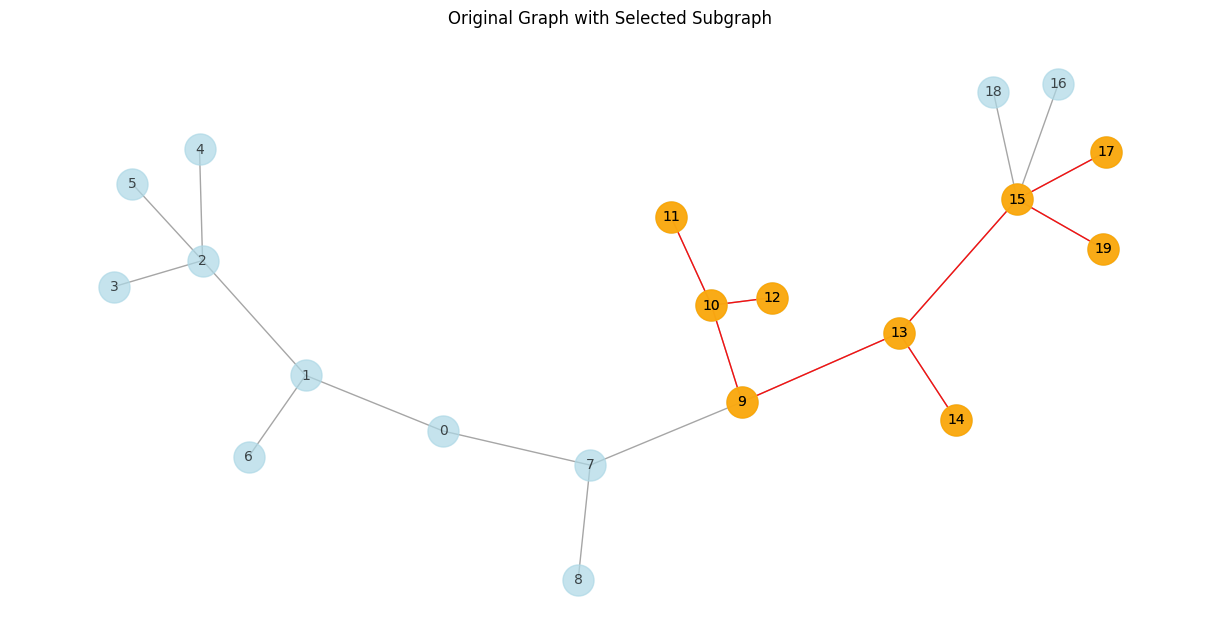

In [21]:
# Plot the original graph
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10, alpha=0.7)

# Highlight the subgraph
nx.draw(subgraph, pos, with_labels=True, node_color='orange', edge_color='red', node_size=500, font_size=10, alpha=0.9)

plt.title('Original Graph with Selected Subgraph')
plt.show()

# Original Training Data

In [13]:
import pickle as pkl
import torch

In [14]:
# Load the object using torch.load with map_location
with open("/usrvol/processed_data/SNLI/test/constituency/constituency0.pkl", 'rb') as f:
    graphs = pkl.load(f)

In [17]:
graphs[0][0].nodes

NodeView(('S', 'NP0', 0, 5, 12, 'VP1', 18, 'PP11', 24, 'NP111', 27, 31, 'SBAR12', 32, 'S121', 'NP1210', 41, 'VP1211', 'NP12111', 'NP121110', 51, 58, 'PP121111', 64, 'NP1211111', 73, 'PP12112', 78, 'NP121121', 89))

In [16]:
graphs

[(<networkx.classes.digraph.DiGraph at 0x76678cfba950>,
  'neutral'),
 (<networkx.classes.digraph.DiGraph at 0x76678dcb50f0>,
  'entailment'),
 (<networkx.classes.digraph.DiGraph at 0x76678d3959f0>,
  'contradiction'),
 (<networkx.classes.digraph.DiGraph at 0x7668c8436710>,
  'neutral'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21c280>,
  'entailment'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21ddb0>,
  'contradiction'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21c760>,
  'entailment'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21ffd0>,
  'neutral'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21f880>,
  'contradiction'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21fdf0>,
  'neutral'),
 (<networkx.classes.digraph.DiGraph at 0x76678d21fcd0>,
  'entailment'),
 (<networkx.classes.digraph.DiGraph at 0x76678cd56bc0>,
  'contradiction'),
 (<networkx.classes.digraph.DiGraph at 0x76678cd570d0>,
  'entailment'),
 (<networkx.classes.digraph.DiGraph at 0x76678cd541